In [ ]:
'''
Name        : Shamala C
E-mail      : shamalac1997@gmail.com
Contact     : 7619668894
Designation : Software Engineer 
'''

### Capstone Project - Employee Attrition

In [1]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

### Loading the HR_Employee_Attrition_Data.csv

In [2]:
data = pd.read_csv("C:\\Users\\shamala.c\\Learnbay Python Classes\\Machine Learning\\Capstone-Project\\HR_Employee_Attrition_Data.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#Fecthing the number of rows(Employees) and the columns(data points) in the csv file.
data.shape

(2940, 35)

In [5]:
#checking for dtypes for each datapoint
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#Get a count of each empty value in the columns(Data points)
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#check if there are any null/missing values in the dataset 
data.isnull().sum().any()

False

'There is no null values in the dataset'

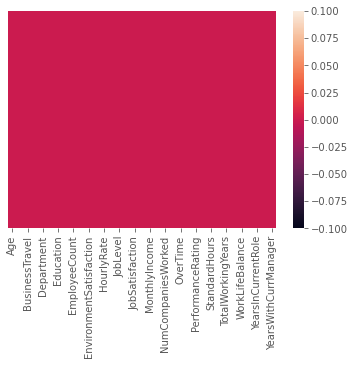

In [8]:
sns.heatmap(data.isnull(), yticklabels = False)
"""There is no null values in the dataset"""

In [9]:
#5 Number Summary for Outlier Detection 
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


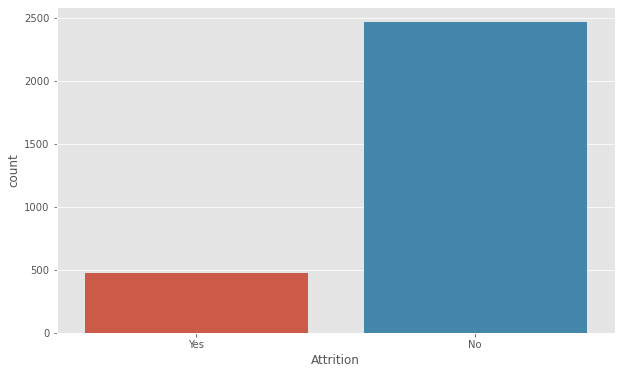

"0 - indicating the Attrition as NO, employee not leaving the company and 1 - indicating the Attrition as YES, employee has '\n'left the company."

In [10]:
#Show the number of employees that left and stayed in the company
plt.figure(figsize = (10,6))
sns.countplot(x= 'Attrition',data = data)
plt.show()
"""0 - indicating the Attrition as NO, employee not leaving the company and 1 - indicating the Attrition as YES, employee has '\n'left the company."""

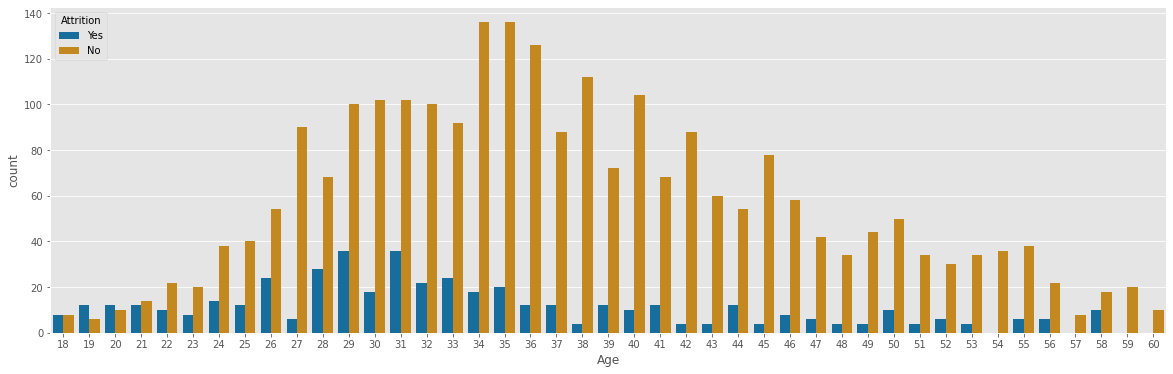

"From the graph we are able to see that there is NO LINEAR relation between 'Age' and 'Attrition' But majority of the Attrion is happening \nbetween the age groups of 25-32"

In [11]:
#Show the number of employees that left and stayed by age
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age',data = data, hue = 'Attrition', palette = 'colorblind')
plt.show()
"""Insight From the Below Graph"""
"""From the graph we are able to see that there is NO LINEAR relation between 'Age' and 'Attrition' But majority of the Attrion is happening 
between the age groups of 25-32"""

In [12]:
#Calculate the Attrition Percentage
percentage = (data['Attrition'].value_counts()['Yes']/data['Attrition'].count())*100
print("Company Attrition Percentage is ",percentage)

Company Attrition Percentage is  16.122448979591837


Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


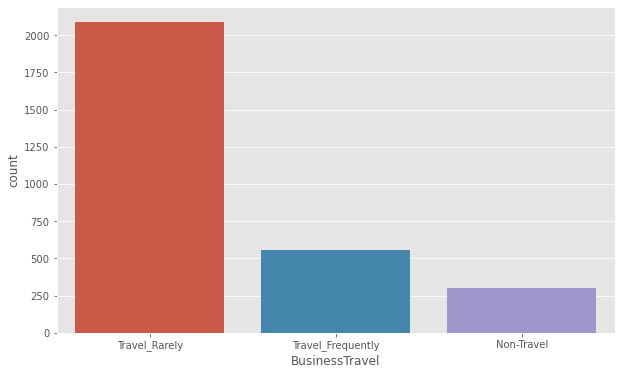

In [13]:
#plotting the count by business travel
plt.figure(figsize = (10,6))
print(data['BusinessTravel'].value_counts())
sns.countplot(x= 'BusinessTravel',data = data)
plt.show()

In [14]:
#Creating new varibale 'cat_BusinessTravel' , converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Traveler = 3
data.loc[data['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
data.loc[data['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
data.loc[data['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,1.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,1.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,1.0


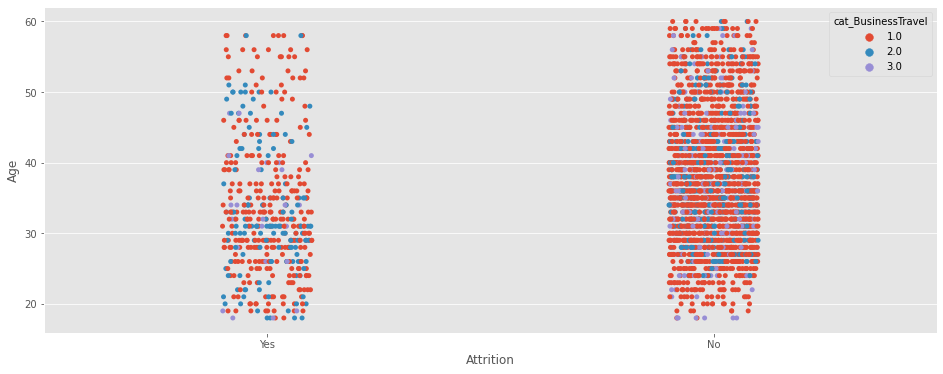

"From the graph we can understand that the Attrion Rate is higher for the age groups of '25-32' and they also travel more in this age group."

In [15]:
#Plotting the Attrition between Age and Business Travel
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Traveler = 3
plt.figure(figsize = (16,6))
sns.stripplot(x = 'Attrition', y = 'Age',data = data, hue = 'cat_BusinessTravel')
plt.show()
"""Insight From the Below Graph"""
"""From the graph we can understand that the Attrion Rate is higher for the age groups of '25-32' and they also travel more in this age group."""

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


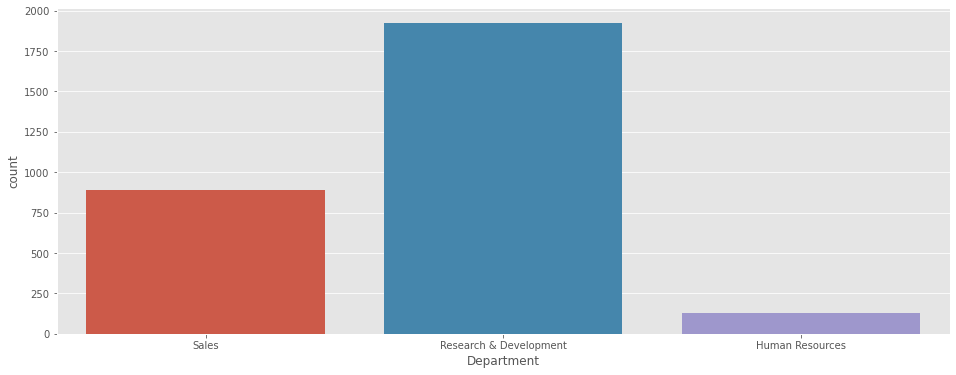

In [16]:
#Plotting counts for department 
plt.figure(figsize = (16,6))
print(data['Department'].value_counts())
sns.countplot(data['Department'])
plt.show()

In [17]:
#converting department into a ordinal variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Traveler = 3
data.loc[data['Department'] == 'Sales','ord_BusinessTravel'] = 1
data.loc[data['Department'] == 'Research & Development','ord_BusinessTravel'] = 2
data.loc[data['Department'] == 'Human Resources','ord_BusinessTravel'] = 3
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,2.0,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0,2.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2.0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1.0,2.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,2.0,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,1.0,2.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,1.0,2.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,2.0,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,1.0,2.0


In [18]:
#Getting the count of Business Travel based on Department
#HR
departmentgrp = data.groupby(by = 'Department')
df1 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['Department'] = 'HR'
df1

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [19]:
#R&D
df2 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'R&D'
df2 = df2.append(df1, ignore_index=True)
df2

,index,BusinessTravel,Department
0,Travel_Rarely,1364,R&D
1,Travel_Frequently,364,R&D
2,Non-Travel,194,R&D
3,Travel_Rarely,92,HR
4,Travel_Frequently,22,HR
5,Non-Travel,12,HR


In [20]:
df3 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
df3 = df3.to_frame().reset_index()
df3['Department'] = 'Sales'
df4 = df3.append(df2, ignore_index=True)
df4

,index,BusinessTravel,Department
0,Travel_Rarely,630,Sales
1,Travel_Frequently,168,Sales
2,Non-Travel,94,Sales
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D
6,Travel_Rarely,92,HR
7,Travel_Frequently,22,HR
8,Non-Travel,12,HR


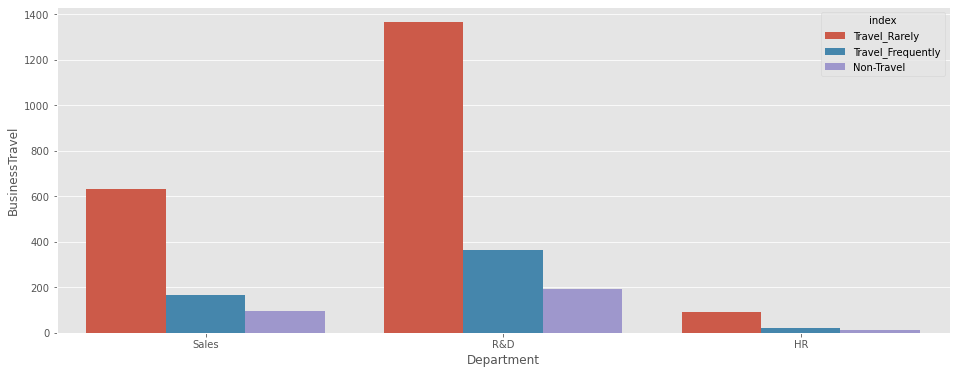

In [21]:
#Plotting counts for department 
plt.figure(figsize = (16,6))
sns.barplot(x = 'Department', y = 'BusinessTravel', data = df4, hue = 'index')
plt.show()

In [173]:
#Calulating the Attrition for each department
#Sales
attrBySales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrByHr = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#R&D
attrByRd = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()

attrByDept = pd.DataFrame(columns = ['Department','Attrition'])
attrByDept.loc[len(attrByDept)] = ["Sales", attrBySales['Yes']/(attrBySales.sum())*100]
attrByDept.loc[len(attrByDept)] = ["Human Resources", attrByHr['Yes']/(attrByHr.sum())*100]
attrByDept.loc[len(attrByDept)] = ["Research & Development", attrByRd['Yes']/(attrByRd.sum())*100]
attrByDept



,Department,Attrition
0,Sales,20.627803
1,Human Resources,19.047619
2,Research & Development,13.839750


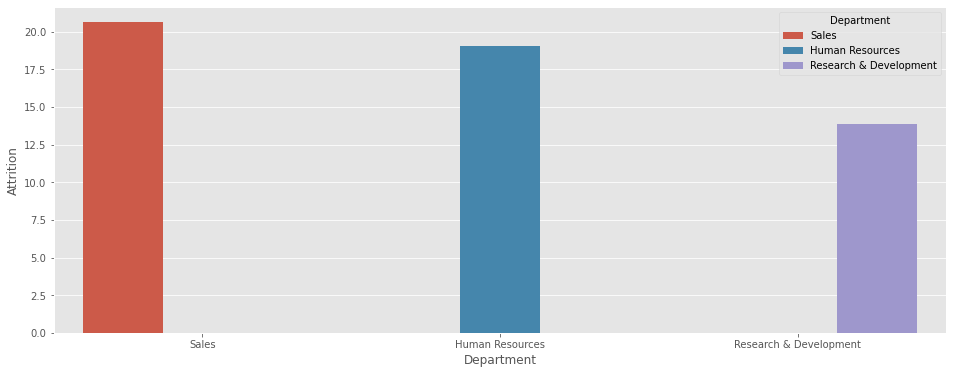

'Attrition is high in Sales Teams quite followed by HR'

In [174]:
#Plotting Attrition Percentage for each Department.
plt.figure(figsize = (16,6))
sns.barplot(x = 'Department', y = 'Attrition',data = attrByDept, hue = 'Department')
plt.show()
"""Insight"""
"""Attrition is high in Sales Teams quite followed by HR"""

In [24]:
#Calulating the Attrition vs EnvironmentSatisfaction level
#EnvironmentSatisfaction 
envSatisfactionGrp  = data.groupby(['EnvironmentSatisfaction','Attrition'])
envSatisfactionGrp.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [25]:
count = envSatisfactionGrp.get_group((1, 'Yes'))['EnvironmentSatisfaction'].count()
count
AttrperEnvSat = pd.DataFrame(columns = ['EnvironmentSatisfaction','Attrition','Count'])
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['1', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144


In [26]:
count = envSatisfactionGrp.get_group((2, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['2', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86


In [27]:
count = envSatisfactionGrp.get_group((3, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['3', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124


In [28]:
count = envSatisfactionGrp.get_group((4, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['4', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


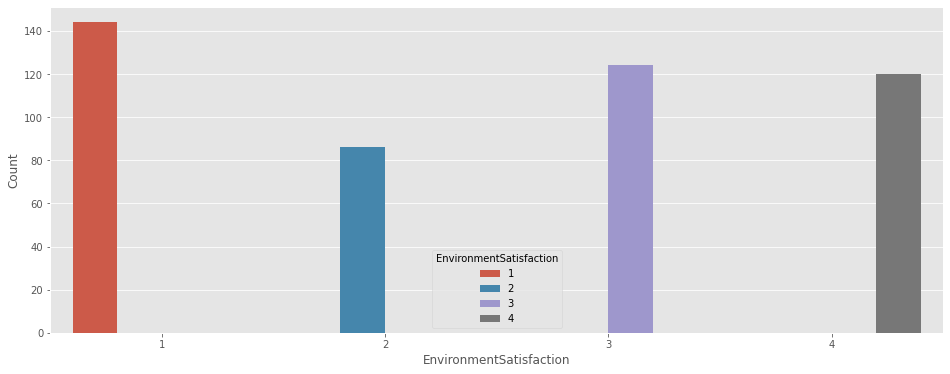

'Attrition is high for the group having EnvironmentSatisfaction level 1 followed by level3,level4 and level2(Lowest).'

In [29]:
#Plotting Attrition Percentage for each EnvironmentSatisfaction Level.
plt.figure(figsize = (16,6))
sns.barplot(x = 'EnvironmentSatisfaction', y = 'Count', data = AttrperEnvSat, hue = 'EnvironmentSatisfaction')
plt.show()

"""Insight From the Below Graph"""
"""Attrition is high for the group having EnvironmentSatisfaction level 1 followed by level3,level4 and level2(Lowest)."""

In [30]:
#Attrtion by Gender
AttrGender = data.groupby(['Attrition','Gender'])
AttrGender.groups.keys()

dict_keys([('No', 'Female'), ('No', 'Male'), ('Yes', 'Female'), ('Yes', 'Male')])

In [31]:
AttrGend = pd.DataFrame(columns = ['Gender','Attrition','Count'])
AttrGend

,Gender,Attrition,Count


In [32]:
count = AttrGender.get_group(('Yes','Female'))['Attrition'].count()
AttrGend.loc[len(AttrGend)] = ['Female', 'Yes', count]
AttrGend

,Gender,Attrition,Count
0,Female,Yes,174


In [33]:
count = AttrGender.get_group(('Yes','Male'))['Attrition'].count()
AttrGend.loc[len(AttrGend)] = ['Male', 'Yes', count]
AttrGend

,Gender,Attrition,Count
0,Female,Yes,174
1,Male,Yes,300


In [34]:
data['Gender'].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

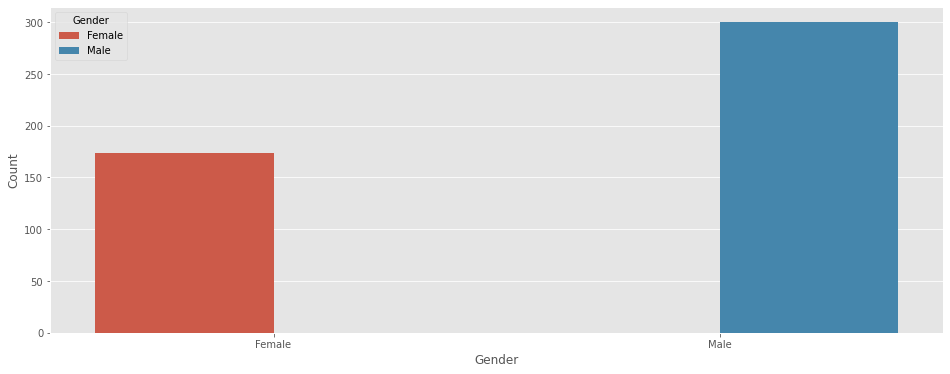

'Out of all the people who have left Male are having the highest Attrtion rate.'

In [35]:
#Plotting Attrition Percentage for each EnvironmentSatisfaction Level.
plt.figure(figsize = (16,6))
sns.barplot(x = 'Gender', y = 'Count', data = AttrGend, hue = 'Gender')
plt.show()

"""Insight From the Below Graph"""
"""Out of all the people who have left Male are having the highest Attrtion rate."""

In [36]:
#Attrtion by JobLevel
AttrJobLevel = data.groupby(['JobLevel','Attrition'])
AttrJobLevel.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [37]:
AttrJob = pd.DataFrame(columns = ['JobLevel','Attrition','Count', 'Atrrition Percentage'])
AttrJob
count = AttrJobLevel.get_group((1,'Yes'))['Attrition'].count()
count

286

In [38]:
count = AttrJobLevel.get_group((1,'Yes'))['Attrition'].count()
count


286

In [39]:
AttrJob.loc[len(AttrJob)] = ['1', 'Yes', count, (count/ data['JobLevel'].value_counts()[1])*100]
AttrJob

,JobLevel,Attrition,Count,Atrrition Percentage
0,1,Yes,286,26.335175


In [40]:
count = AttrJobLevel.get_group((2,'Yes'))['Attrition'].count()
AttrJob.loc[len(AttrJob)] = ['2', 'Yes', count, (count/ data['JobLevel'].value_counts()[2])*100]
AttrJob

,JobLevel,Attrition,Count,Atrrition Percentage
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828


In [41]:
count = AttrJobLevel.get_group((3,'Yes'))['Attrition'].count()
AttrJob.loc[len(AttrJob)] = ['3', 'Yes', count, (count/ data['JobLevel'].value_counts()[3])*100]
AttrJob

,JobLevel,Attrition,Count,Atrrition Percentage
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899


In [42]:
count = AttrJobLevel.get_group((4,'Yes'))['Attrition'].count()
AttrJob.loc[len(AttrJob)] = ['4', 'Yes', count, (count/ data['JobLevel'].value_counts()[4])*100]
AttrJob

,JobLevel,Attrition,Count,Atrrition Percentage
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981


In [43]:
count = AttrJobLevel.get_group((5,'Yes'))['Attrition'].count()
AttrJob.loc[len(AttrJob)] = ['5', 'Yes', count, (count/ data['JobLevel'].value_counts()[5])*100]
AttrJob

,JobLevel,Attrition,Count,Atrrition Percentage
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981
4,5,Yes,10,7.246377


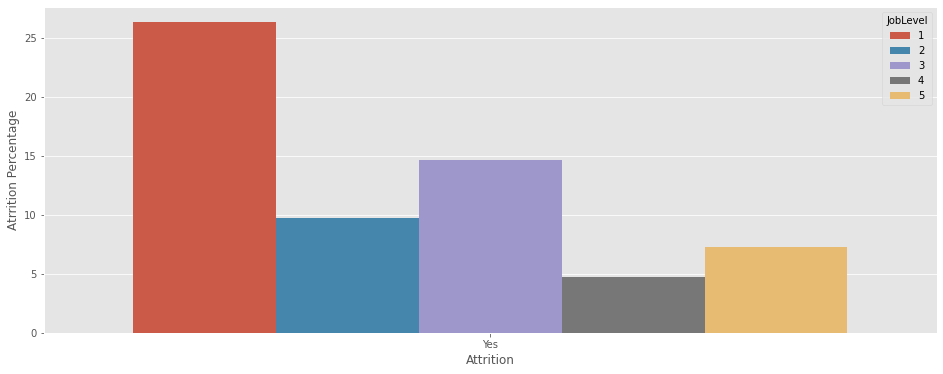

'Attrition Percentage is high for Joblevel 1 followed by Joblevel3'

In [44]:
#Plotting Attrition Percentage for each Job Level.
plt.figure(figsize = (16,6))
sns.barplot(x = 'Attrition', y = 'Atrrition Percentage', data = AttrJob, hue = 'JobLevel')
plt.show()

"""Insight From the Below Graph"""
"""Attrition Percentage is high for Joblevel 1 followed by Joblevel3"""

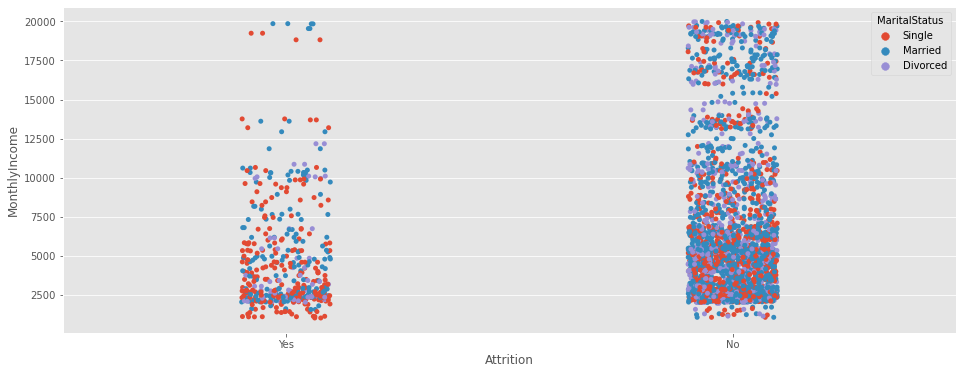

'Attrition is high for the employees who are earning between 2500-5000'

In [45]:
#Plotting Attrition vs Monthly Income.
plt.figure(figsize = (16,6))
sns.stripplot(x = 'Attrition', y = 'MonthlyIncome', data = data, hue = 'MaritalStatus')
plt.show()
"""Insight From the Below Graph"""
"""Attrition is high for the employees who are earning between 2500-5000"""

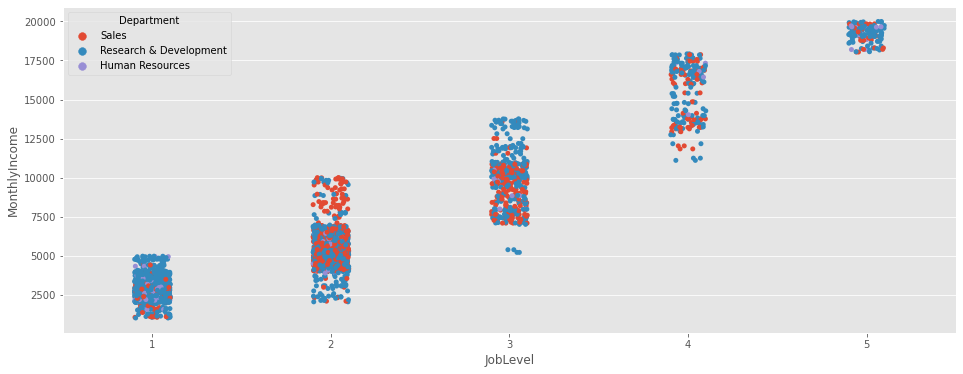

'Employess working in the Job level 5 and working in Research & Development department are having high Monthly Income'

In [46]:
#Plotting JobLevel vs Monthly Income.
plt.figure(figsize = (16,6))
sns.stripplot(x = 'JobLevel', y = 'MonthlyIncome', data = data, hue = 'Department')
plt.show()
"""Insight From the Below Graph"""
"""Employess working in the Job level 5 and working in Research & Development department are having high Monthly Income"""

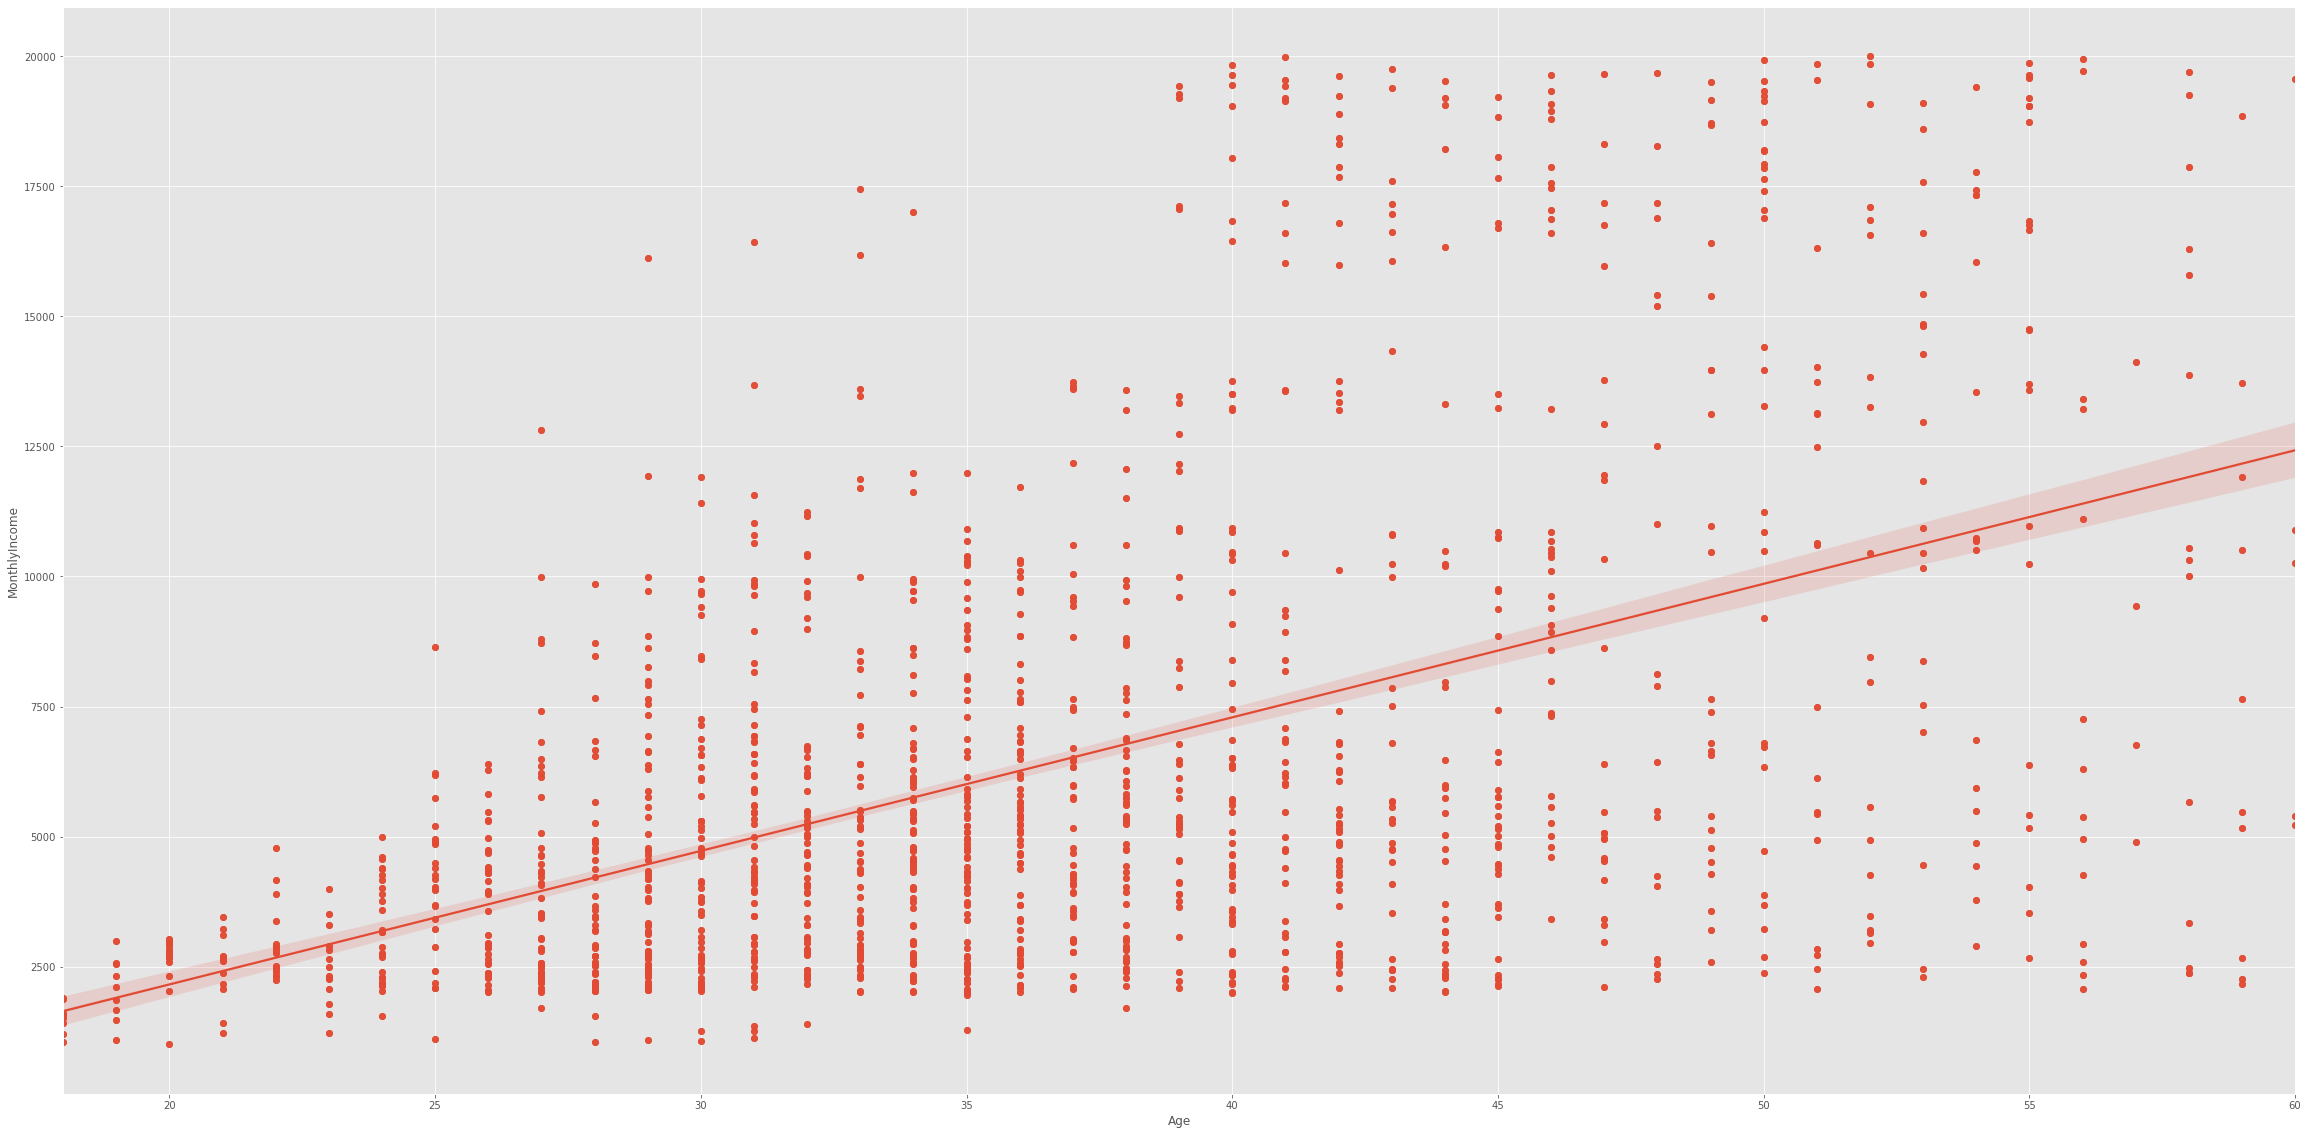

'From the below graph we can say that both age and monthly income are directly proportional which explains employees with more year \nof experience who are old are earning more income monthly'

In [47]:
#Plotting Age vs Monthly Income.
plt.figure(figsize = (40,20))
sns.regplot(x = 'Age', y = 'MonthlyIncome', data = data)
plt.show()
"""Insight from the below graph"""
"""From the below graph we can say that both age and monthly income are directly proportional which explains employees with more year 
of experience who are old are earning more income monthly"""

In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,2.0,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0,2.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2.0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,1.0,2.0


In [49]:
data['PercentSalaryHike'].describe()

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


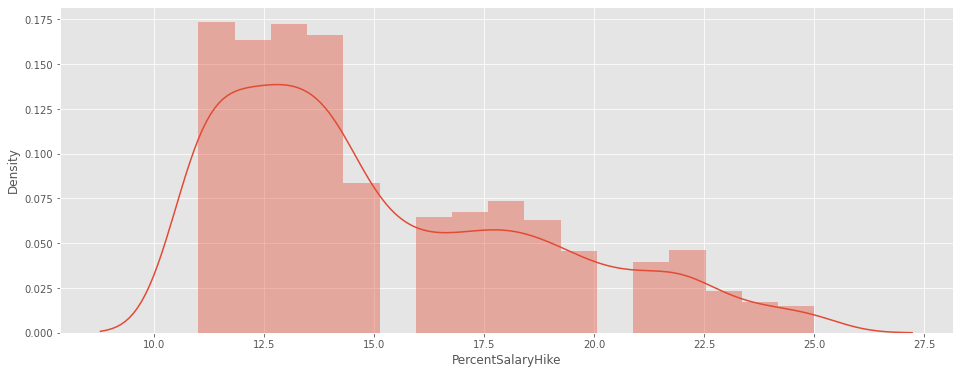

'The Salary hike histogram is skewed to the right'

In [50]:
#Plotting histograms for the hikes
plt.figure(figsize = (16,6))
sns.distplot(data['PercentSalaryHike'], kde = True)
plt.show()
"""Insight from the below graph"""
"""The Salary hike histogram is skewed to the right"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


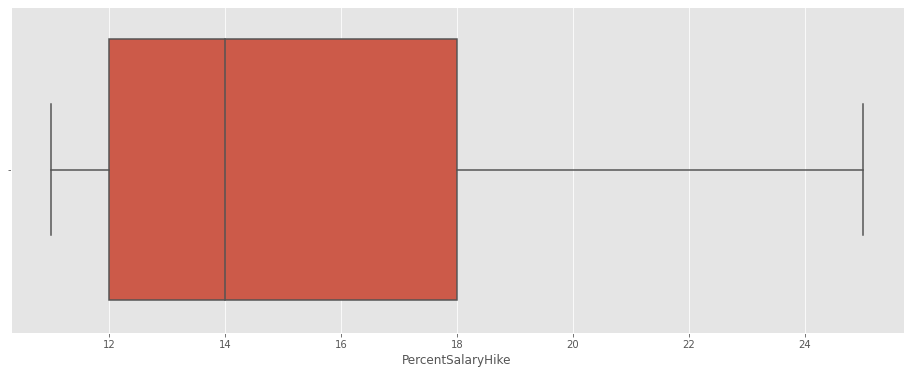

'The Median Salary hike is 14%, Mean is 15%. Mean is statistically greater than median.The lowest salary 11% of the emoplyees are earning and\nThe highest salary only 25% of the employees are having.'

In [51]:
#Plotting histograms for the hikes
plt.figure(figsize = (16,6))
sns.boxplot(data['PercentSalaryHike'], data = data)
plt.show()
"""Insight from the below graph"""
"""The Median Salary hike is 14%, Mean is 15%. Mean is statistically greater than median.The lowest salary 11% of the emoplyees are earning and
The highest salary only 25% of the employees are having."""

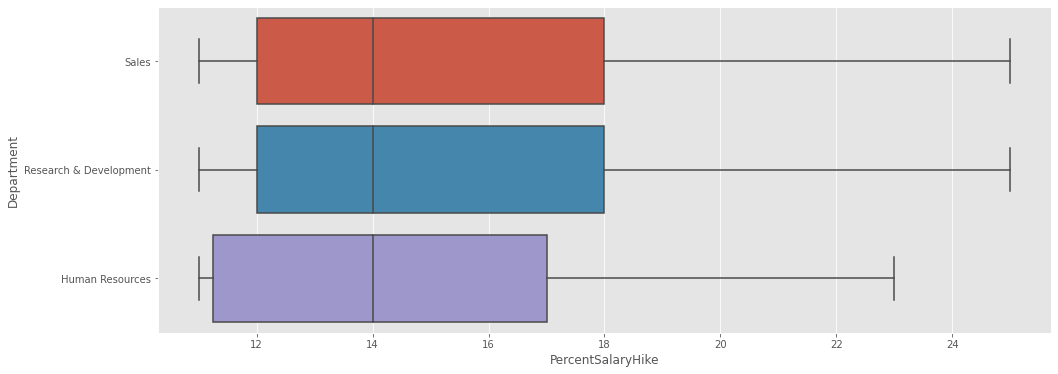

In [52]:
#Plotting hikes for the departments
plt.figure(figsize = (16,6))
sns.boxplot(x = 'PercentSalaryHike', y = 'Department', data = data)
plt.show()

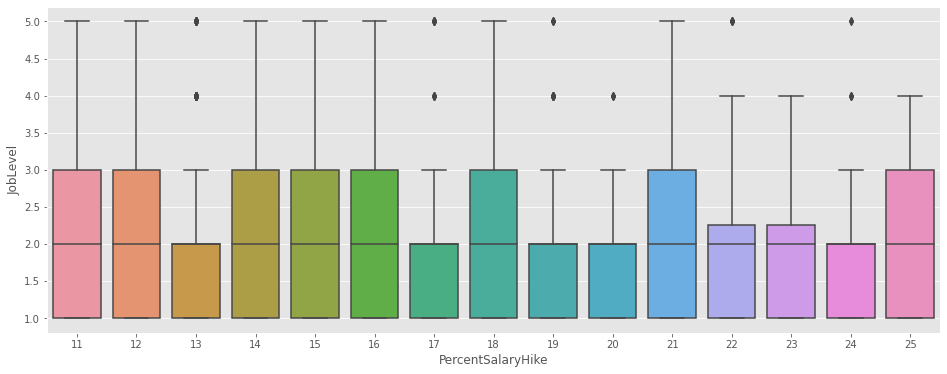

In [53]:
#Plotting hikes for the Job Level
plt.figure(figsize = (16,6))
sns.boxplot(x = 'PercentSalaryHike', y = 'JobLevel', data = data)
plt.show()

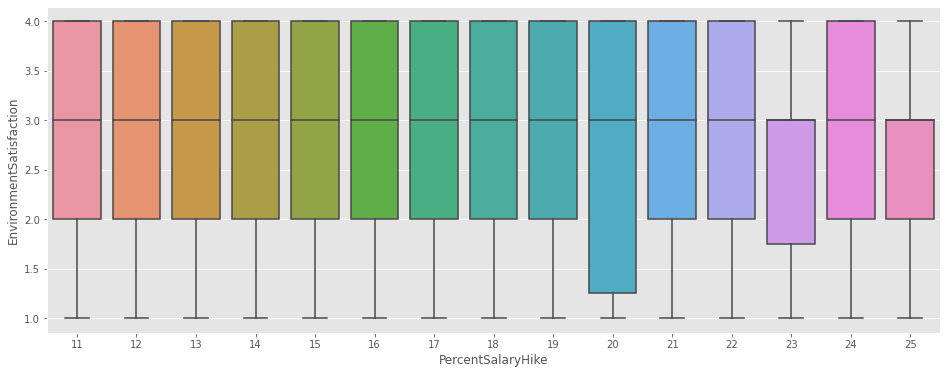

In [54]:
#Plotting hikes for the EnvironmentSatisfaction
plt.figure(figsize = (16,6))
sns.boxplot(x = 'PercentSalaryHike', y = 'EnvironmentSatisfaction', data = data)
plt.show()

In [71]:
grp = data.groupby(['JobSatisfaction','Attrition'])
grp.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [92]:

count = grp.get_group((1,'Yes'))['Attrition'].count()
count

132

In [93]:
AttrJobSatisfaction = pd.DataFrame(columns = ['JobSatisfaction','Attrition','Count', 'Atrrition Percentage'])
AttrJobSatisfaction

,JobSatisfaction,Attrition,Count,Atrrition Percentage


In [94]:
count = grp.get_group((1,'Yes'))['Attrition'].count()
AttrJobSatisfaction.loc[len(AttrJobSatisfaction)] = ['1', 'Yes', count, (count/ data['JobLevel'].value_counts()[1])*100]
AttrJobSatisfaction

,JobSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,132,12.154696


In [95]:
count = grp.get_group((2,'Yes'))['Attrition'].count()
AttrJobSatisfaction.loc[len(AttrJobSatisfaction)] = ['2', 'Yes', count, (count/ data['JobLevel'].value_counts()[2])*100]
AttrJobSatisfaction

,JobSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,132,12.154696
1,2,Yes,92,8.614232


In [96]:
count = grp.get_group((3,'Yes'))['Attrition'].count()
AttrJobSatisfaction.loc[len(AttrJobSatisfaction)] = ['3', 'Yes', count, (count/ data['JobLevel'].value_counts()[3])*100]
AttrJobSatisfaction

,JobSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,132,12.154696
1,2,Yes,92,8.614232
2,3,Yes,146,33.486239


In [97]:
count = grp.get_group((4,'Yes'))['Attrition'].count()
AttrJobSatisfaction.loc[len(AttrJobSatisfaction)] = ['4', 'Yes', count, (count/ data['JobLevel'].value_counts()[4])*100]
AttrJobSatisfaction

,JobSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,132,12.154696
1,2,Yes,92,8.614232
2,3,Yes,146,33.486239
3,4,Yes,104,49.056604


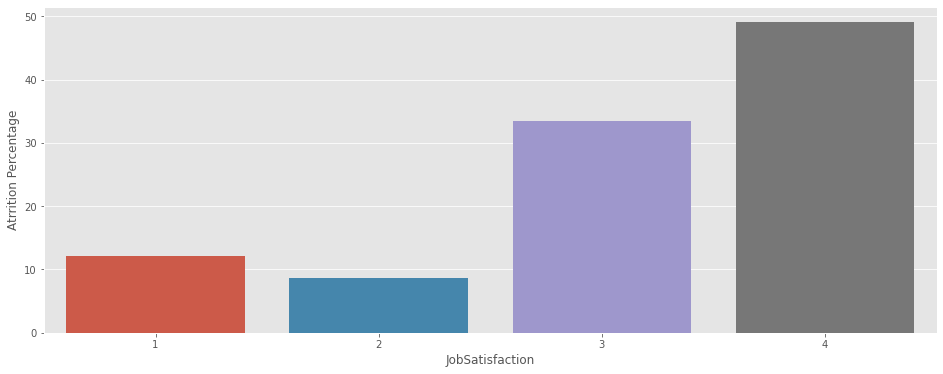

'Attrition Percentage is high for Joblevel 4 followed by Joblevel3'

In [98]:
#Plotting Attrition Percentage for Job Satisfaction Level.
plt.figure(figsize = (16,6))
sns.barplot(x = 'JobSatisfaction', y = 'Atrrition Percentage', data = AttrJobSatisfaction)
plt.show()

"""Insight from the below graph"""
"""Attrition Percentage is high for Joblevel 4 followed by Joblevel3"""

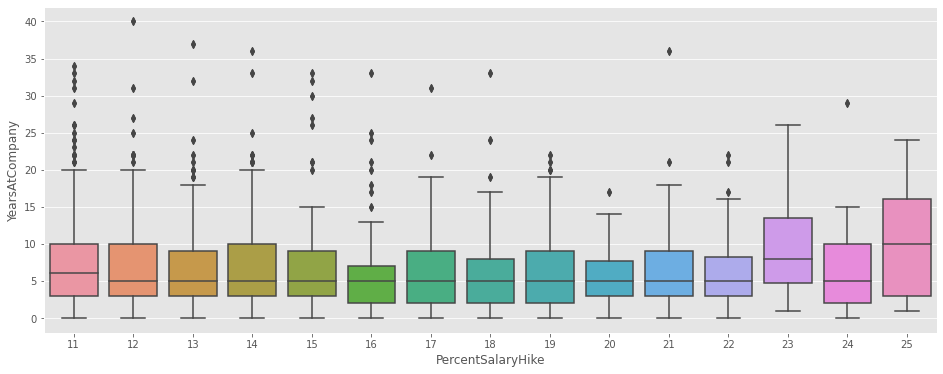

In [101]:
#Plotting hikes % for number of years in the company
plt.figure(figsize = (16,6))
sns.boxplot(x = 'PercentSalaryHike', y = 'YearsAtCompany', data = data)
plt.show()

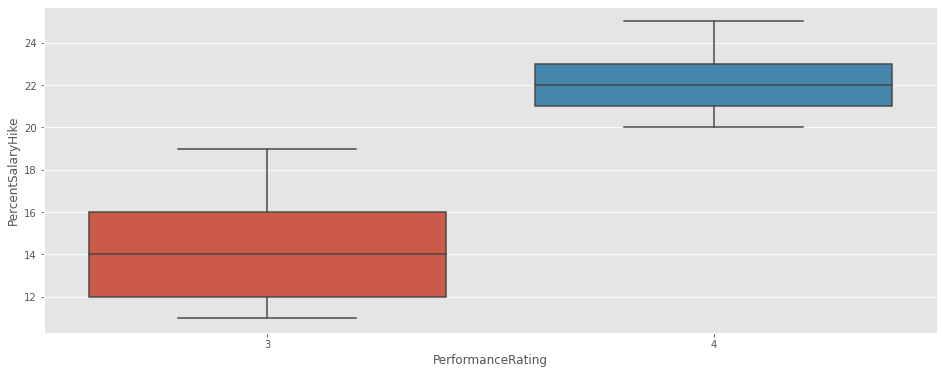

'Employees with highest rating of 4 have got hikes between (20-25)%, whereas employees with the rating of 3 have got hikes between (6 - 19)%'

In [102]:
#Plotting hikes % for number of years in the company
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'PerformanceRating', data = data)
plt.show()
"""Insight from the below graph"""
"""Employees with highest rating of 4 have got hikes between (20-25)%, whereas employees with the rating of 3 have got hikes between (6 - 19)%"""

In [122]:
grp1 = data.groupby(['RelationshipSatisfaction','Attrition'])
grp1.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [123]:
count = grp1.get_group((1,'Yes'))['Attrition'].count()
count

114

In [124]:
AttrRelationSatisfaction = pd.DataFrame(columns = ['RelationshipSatisfaction','Attrition','Count', 'Atrrition Percentage'])
AttrRelationSatisfaction

,RelationshipSatisfaction,Attrition,Count,Atrrition Percentage


In [125]:
count = grp1.get_group((1,'Yes'))['Attrition'].count()
AttrRelationSatisfaction.loc[len(AttrRelationSatisfaction)] = ['1', 'Yes', count, (count/ data['JobLevel'].value_counts()[1])*100]
AttrRelationSatisfaction

,RelationshipSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,114,10.497238


In [126]:
count = grp1.get_group((2,'Yes'))['Attrition'].count()
AttrRelationSatisfaction.loc[len(AttrRelationSatisfaction)] = ['2', 'Yes', count, (count/ data['JobLevel'].value_counts()[2])*100]
AttrRelationSatisfaction

,RelationshipSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,114,10.497238
1,2,Yes,90,8.426966


In [127]:
count = grp1.get_group((3,'Yes'))['Attrition'].count()
AttrRelationSatisfaction.loc[len(AttrRelationSatisfaction)] = ['3', 'Yes', count, (count/ data['JobLevel'].value_counts()[3])*100]
AttrRelationSatisfaction

,RelationshipSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,114,10.497238
1,2,Yes,90,8.426966
2,3,Yes,142,32.568807


In [128]:
count = grp1.get_group((4,'Yes'))['Attrition'].count()
AttrRelationSatisfaction.loc[len(AttrRelationSatisfaction)] = ['4', 'Yes', count, (count/ data['JobLevel'].value_counts()[4])*100]
AttrRelationSatisfaction

,RelationshipSatisfaction,Attrition,Count,Atrrition Percentage
0,1,Yes,114,10.497238
1,2,Yes,90,8.426966
2,3,Yes,142,32.568807
3,4,Yes,128,60.377358


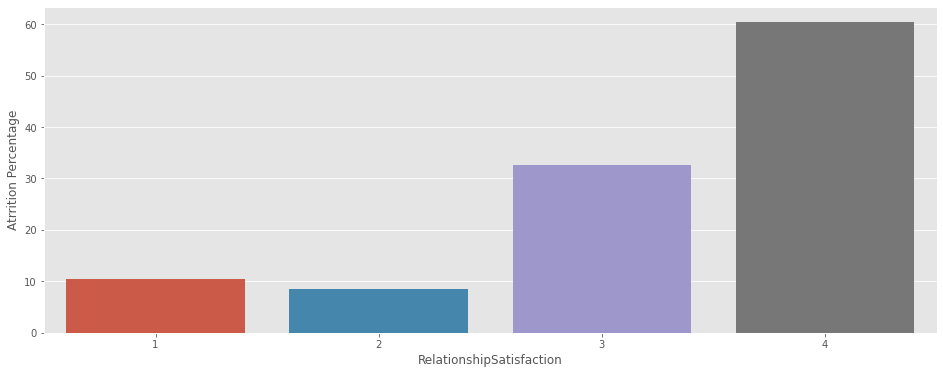

'Employees with the job satisfaction have the highest attrition rate'

In [175]:
#Plotting Attrition Percentage for Job Satisfaction Level.
plt.figure(figsize = (16,6))
sns.barplot(x = 'RelationshipSatisfaction', y = 'Atrrition Percentage', data = AttrRelationSatisfaction)
plt.show()

"""Insight from the below graph"""
"""Employees with the job satisfaction have the highest attrition rate"""

In [130]:
#print all of the data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column)+ ':' + str(data[column].unique()))
        print(data[column].value_counts())
        print('__________________________________________________________________________')


Attrition:['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
__________________________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
__________________________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
__________________________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
_____________________________________________

In [131]:
data['EmployeeCount'].unique()


array([1], dtype=int64)

In [132]:
StandardHours = data['StandardHours'].unique()
StandardHours

array([80], dtype=int64)

In [133]:
'''We can ignore the Over18,StandardHours and EmployeeCount datapoints which is actually not contributing to the Attrition and All are having only one unique values.'''


'''Remove useless columns from the csv file'''
data = data.drop('Over18', axis = 1)
data = data.drop('EmployeeNumber', axis = 1)
data = data.drop('StandardHours', axis = 1)
data = data.drop('EmployeeCount', axis = 1)

In [134]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_BusinessTravel
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.024751,0.031882
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.004086,-0.007109
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.024469,-0.017225
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.000757,-0.007996
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.004174,0.019395
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.026528,0.004144
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.039062,0.024586
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.019311,-0.101963
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,0.033962,-0.021001
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.034319,-0.053130


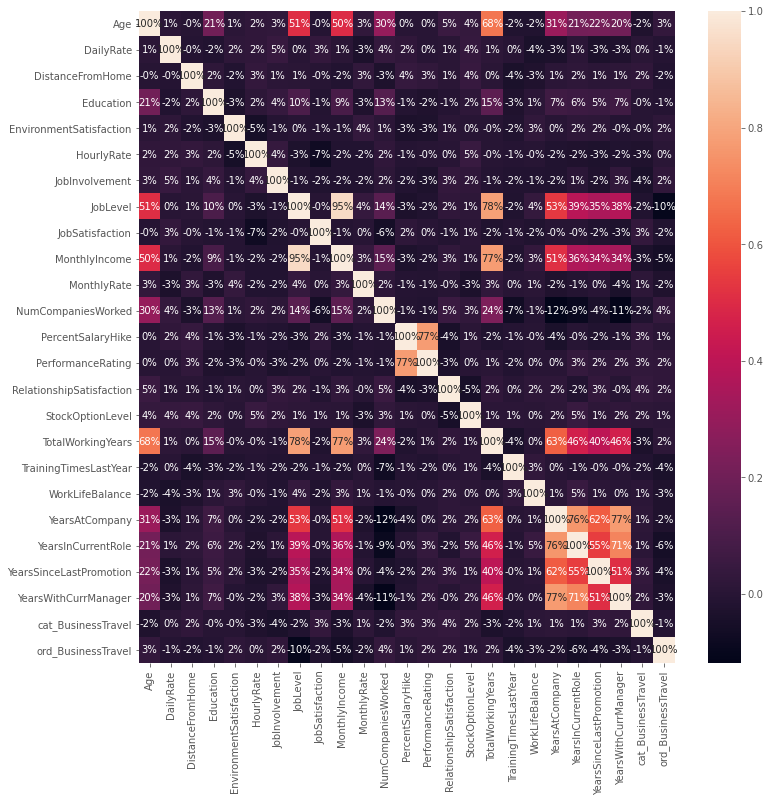

'The longer employees work at a job the higher will be the job level,Age and MonthlyIncome as per the below correlation map'

In [135]:
#Visualize the correlation
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt= '.0%')
plt.show()

"""Insight from the below graph"""
'''The longer employees work at a job the higher will be the job level,Age and MonthlyIncome as per the below correlation map'''

In [149]:
#Transform the Data
#Transform the non-numerical into numerical columns
from sklearn.preprocessing import LabelEncoder
import numpy as np
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

<ipython-input-149-035040109fd0>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


In [151]:
names = ['BusinessTravel', 'DailyRate', 'Department', 
         'DistanceFromHome', 'Education', 'EducationField', 
         'EnvironmentSatisfaction', 'Gender', 
         'HourlyRate','JobInvolvement', 
         'JobLevel', 'JobRole',
         'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 
         'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 
         'PercentSalaryHike', 'PerformanceRating', 
         'RelationshipSatisfaction', 'StockOptionLevel', 
         'TotalWorkingYears', 'TrainingTimesLastYear', 
         'WorkLifeBalance', 'YearsAtCompany', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 
         'YearsWithCurrManager', 'cat_BusinessTravel', 
         'ord_BusinessTravel', 'Age_Years'] 

In [152]:
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_BusinessTravel,Age_Years
0,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1.0,1.0,23
1,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,2.0,2.0,31
2,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1.0,2.0,19
3,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,2.0,2.0,15
4,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,1.0,2.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3,2.0,2.0,18
2936,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7,1.0,2.0,21
2937,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3,1.0,2.0,9
2938,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8,2.0,1.0,31


In [153]:
#split the data|
X = data.iloc[:,1:data.shape[1]].values
Y = data.iloc[:, 0].values

In [154]:
#Split the data into 75% traning and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

### Randoma Forest Classifier

In [155]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier()

### Hyper-Parameter Optimization using GridSearchCV

In [156]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 25,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  324.98


### OOB Rate

In [157]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, Y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [158]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes')

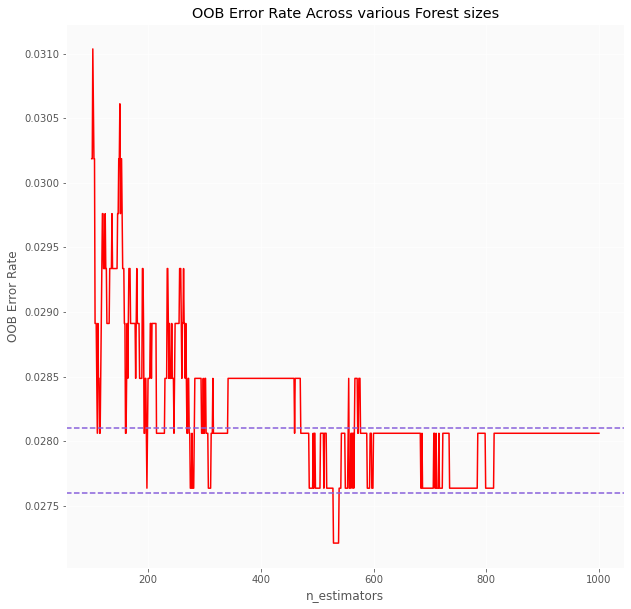

In [159]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.0281, color='#875FDB',linestyle='--')
plt.axhline(0.0276, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes')

In [162]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.02849


In [163]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=400,
                  criterion='gini', 
                  max_depth = 8,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=8, n_estimators=400)

### Train the Model

In [164]:
model = fit_rf.fit(X_train,Y_train)

### Variable Importance

In [165]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [166]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [167]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [168]:
names_index = names[:]
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.08813
2. The feature 'OverTime' has a Mean Decrease in Impurity of 0.07920
3. The feature 'TotalWorkingYears' has a Mean Decrease in Impurity of 0.06147
4. The feature 'Age_Years' has a Mean Decrease in Impurity of 0.05969
5. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.05053
6. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.04647
7. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.04540
8. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.04410
9. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.04022
10. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.03290
11. The feature 'StockOptionLevel' has a Mean Decrease in Impurity of 0.03274
12. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.03242
13. The feature 'JobLevel' has a Mean Decrease in Impurity of 0.02912
14. The featur

In [180]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nEmployee Attrition')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 34)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

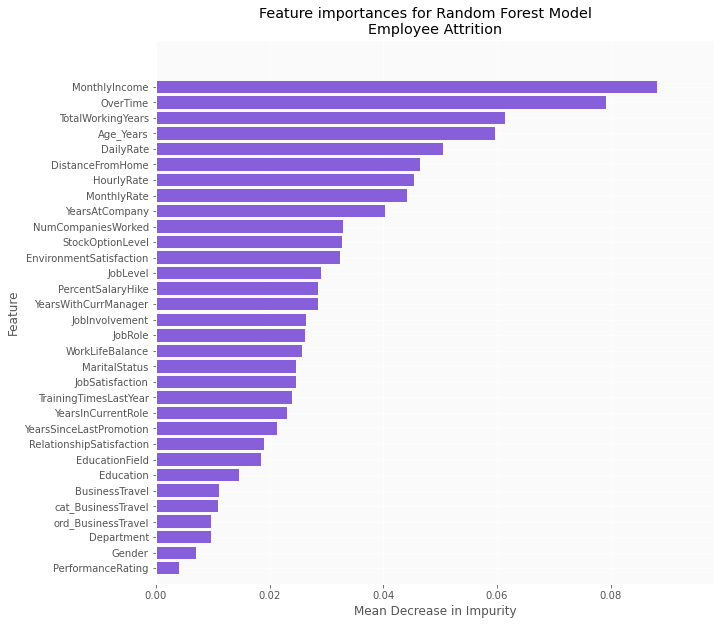

'Monthly Income is having highest feature importance followed by overtime.'

In [181]:
variable_importance_plot(importances_rf, indices_rf, names_index)
"""Insight from the Graph"""
"""Monthly Income is having highest feature importance followed by overtime."""

### Predictions

In [182]:
predictions_rf = fit_rf.predict(X_test)

### Confusion Matrix

In [183]:
def create_conf_mat(Y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(Y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (Y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = Y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

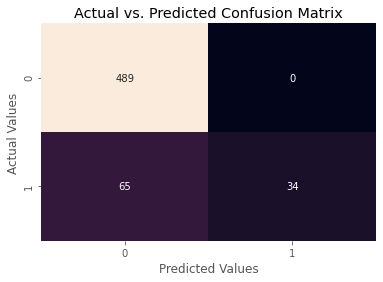

In [184]:
conf_mat = create_conf_mat(Y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Accuracy

In [185]:
accuracy_rf = fit_rf.score(X_test, Y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.889


### Error Rate

In [186]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1105


In [187]:

from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _ = roc_curve(Y_test, predictions_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)

### Area Under Curve (AUC)

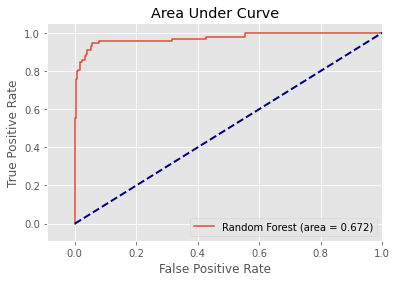

In [188]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

rf_roc_auc = roc_auc_score(Y_test, fit_rf.predict(X_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test,fit_rf.predict_proba(X_test)[:,1])
plt.figure(1)

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.09, 1.0])
plt.ylim([-0.09, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [189]:
#Get the accuracy on the training data set 
fit_rf.score(X_train, Y_train)

0.9451530612244898